# **Email Spam Detection**

This notebook demonstrates the classification of email spam by MohammadReza Zaheri .


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from torchsummary import summary



In [3]:
df = pd.read_csv("F:\\SpamEmail\\emails.csv")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
df['text'] = df['text'].str.lower()
def clean_text(text):
    text = re.sub('subject:', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    return text

df['text'] = df['text'].apply(clean_text)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
df.spam.value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

In [7]:
spam_data = df[df['spam'] == 1]  
non_spam = df[df['spam'] == 0]  

In [8]:
vectorizer_spam = CountVectorizer(stop_words='english', max_features=1000)
X_bow_spam = vectorizer_spam.fit_transform(spam_data['text']).toarray()
vectorizer_non_spam = CountVectorizer(stop_words='english', max_features=1000)
X_bow_non_spam = vectorizer_non_spam.fit_transform(non_spam['text']).toarray()

words_spam = vectorizer_spam.get_feature_names_out()
counts_spam = np.asarray(X_bow_spam.sum(axis=0))
words_non_spam = vectorizer_non_spam.get_feature_names_out()
counts_non_spam = np.asarray(X_bow_non_spam.sum(axis=0))
word_freq_spam = dict(zip(words_spam, counts_spam))
word_freq_non_spam = dict(zip(words_non_spam, counts_non_spam))
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_spam)
wordcloud_non_spam = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_non_spam)

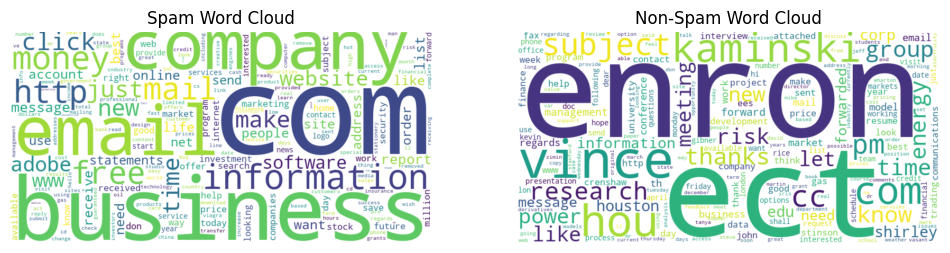

In [9]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Non-Spam Word Cloud')
plt.show()

In [10]:
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['text']).toarray()
y = df['spam']


In [11]:
def model_score(y_true, y_pred):
    f1_scor = f1_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    all = len(y_true)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    error_rate = (fp + fn) / all 
    acc_scor = (tp + tn)/all
    prec_scor = tp/(tp + fp)
    recall_scor = tp/((tp + fn))

    print(f'Model accuracy score: {acc_scor}')
    print(f'Model precision score: {prec_scor}')
    print(f'Model recall score: {recall_scor}')
    print(f'Model f1 score: {f1_scor}')
    print(f'Model specificity score: {specificity}')
    print(f'Model error rate: {error_rate}')    
    print(f'Model sensitivity score: {sensitivity}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1 

In [13]:
model1 = Sequential([
    Dense(64 , activation='relu'),
    Dropout(0.5),
    Dense(32 , activation='relu'),
    Dropout(0.5),
    Dense(16 , activation='relu'),
    Dropout(0.5),
    Dense(8 , activation='relu'),
    Dropout(0.5),
    Dense(4, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=60, batch_size=32, validation_split=0.2)

Epoch 1/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7619 - loss: 0.7168 - val_accuracy: 0.7775 - val_loss: 0.6170
Epoch 2/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7457 - loss: 0.6349 - val_accuracy: 0.7775 - val_loss: 0.5777
Epoch 3/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7670 - loss: 0.5898 - val_accuracy: 0.7775 - val_loss: 0.5529
Epoch 4/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7596 - loss: 0.5612 - val_accuracy: 0.7775 - val_loss: 0.5397
Epoch 5/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7631 - loss: 0.5613 - val_accuracy: 0.7775 - val_loss: 0.5014
Epoch 6/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7613 - loss: 0.5406 - val_accuracy: 0.7775 - val_loss: 0.5044
Epoch 7/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7749 - loss: 0.5236 - val_accuracy: 0.7775 - val_loss: 0.4699
Epoch 8/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7515 - loss: 0.5562 - val_accuracy: 0.

In [25]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        64,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,609 (783.63 KB)

 Trainable params: 66,869 (261.21 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 133,740 (522.43 KB)

In [16]:
y_pred = model1.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)
model_score(y_test,y_pred)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model accuracy score: 0.981675392670157
Model precision score: 0.982078853046595
Model recall score: 0.9448275862068966
Model f1 score: 0.9630931458699473
Model specificity score: 0.9941588785046729
Model error rate: 0.01832460732984293
Model sensitivity score: 0.9448275862068966
Confusion Matrix:
[[851   5]
 [ 16 274]]


# Model 2

In [17]:
model2 = Sequential([
    Dense(128 , activation='relu'),
    Dropout(0.5),
    Dense(64 , activation='relu'),
    Dropout(0.5),
    Dense(32 , activation='relu'),
    Dropout(0.5),
    Dense(16 , activation='relu'),
    Dropout(0.5),
    Dense(8 , activation='relu'),
    Dropout(0.5),
    Dense(4, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=60, batch_size=32, validation_split=0.2)

Epoch 1/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7658 - loss: 0.6776 - val_accuracy: 0.7775 - val_loss: 0.6009
Epoch 2/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7559 - loss: 0.6389 - val_accuracy: 0.7775 - val_loss: 0.5460
Epoch 3/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7727 - loss: 0.6304 - val_accuracy: 0.7775 - val_loss: 0.5455
Epoch 4/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7705 - loss: 0.5902 - val_accuracy: 0.7775 - val_loss: 0.5225
Epoch 5/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7581 - loss: 0.5707 - val_accuracy: 0.7775 - val_loss: 0.4340
Epoch 6/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7663 - loss: 0.5486 - val_accuracy: 0.7775 - val_loss: 0.4121
Epoch 7/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7548 - loss: 0.5531 - val_accuracy: 0.7775 - val_loss: 0.4013
Epoch 8/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7672 - loss: 0.5228 - val_accuracy: 0.

In [18]:
y_pred = model2.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)
model_score(y_test,y_pred)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Model accuracy score: 0.7469458987783595
Model precision score: nan
Model recall score: 0.0
Model f1 score: 0.0
Model specificity score: 1.0
Model error rate: 0.2530541012216405
Model sensitivity score: 0.0
Confusion Matrix:
[[856   0]
 [290   0]]


C:\Users\Mamzi\AppData\Local\Temp\ipykernel_16044\3752074443.py:9: RuntimeWarning: invalid value encountered in scalar divide
  prec_scor = tp/(tp + fp)


In [27]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │       128,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417,569 (1.59 MB)

 Trainable params: 139,189 (543.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 278,380 (1.06 MB)

# Model 3

In [19]:

model3 = Sequential([
    Dense(8 , activation='relu'),
    Dropout(0.5),
    Dense(4 , activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)



Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6861 - loss: 0.6711 - val_accuracy: 0.7775 - val_loss: 0.4737
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7534 - loss: 0.5225 - val_accuracy: 0.7775 - val_loss: 0.3573
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7655 - loss: 0.4449 - val_accuracy: 0.7841 - val_loss: 0.2854
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7910 - loss: 0.3831 - val_accuracy: 0.8691 - val_loss: 0.2281
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8172 - loss: 0.3323 - val_accuracy: 0.9149 - val_loss: 0.1987
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8302 - loss: 0.3192 - val_accuracy: 0.9378 - val_loss: 0.1720
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8405 - loss: 0.2820 - val_accuracy: 0.9597 - val_loss: 0.1494
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8469 - loss: 0.2652 - val_accuracy: 0.

In [28]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 8)              │         8,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,149 (94.34 KB)

 Trainable params: 8,049 (31.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,100 (62.89 KB)

In [20]:
y_pred = model3.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)
model_score(y_test,y_pred)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model accuracy score: 0.981675392670157
Model precision score: 0.9786476868327402
Model recall score: 0.9482758620689655
Model f1 score: 0.9632224168126094
Model specificity score: 0.9929906542056075
Model error rate: 0.01832460732984293
Model sensitivity score: 0.9482758620689655
Confusion Matrix:
[[850   6]
 [ 15 275]]


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


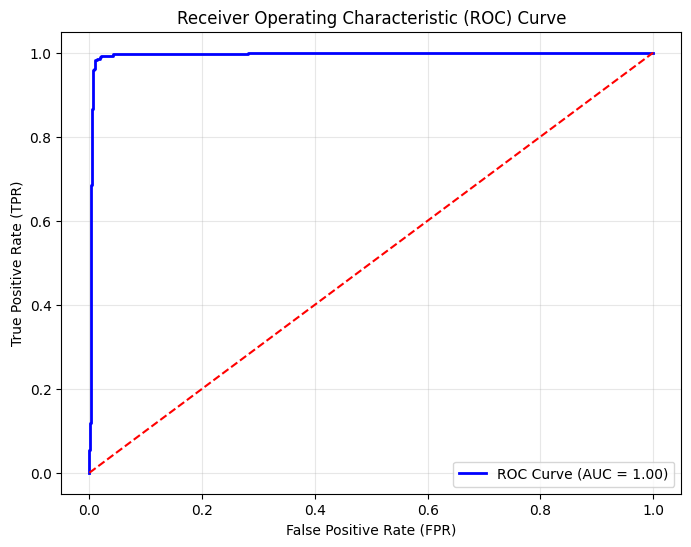

In [21]:
y_pred_proba = model3.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Model 4

In [22]:
model4 = Sequential([
    Dense(128 , activation='sigmoid'),
    Dropout(0.5),
    Dense(64 , activation='sigmoid'),
    Dropout(0.5),
    Dense(32 , activation='sigmoid'),
    Dropout(0.5),
    Dense(16 , activation='sigmoid'),
    Dropout(0.5),
    Dense(8 , activation='sigmoid'),
    Dropout(0.5),
    Dense(4, activation='sigmoid'),
    Dropout(0.5),
    Dense(4, activation='sigmoid'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=60, batch_size=32, validation_split=0.2)

Epoch 1/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7488 - loss: 0.4672 - val_accuracy: 0.7775 - val_loss: 0.2999
Epoch 2/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7624 - loss: 0.4564 - val_accuracy: 0.7775 - val_loss: 0.3049
Epoch 3/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7580 - loss: 0.4467 - val_accuracy: 0.7775 - val_loss: 0.2710
Epoch 4/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7647 - loss: 0.4513 - val_accuracy: 0.7775 - val_loss: 0.2924
Epoch 5/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7583 - loss: 0.4447 - val_accuracy: 0.7775 - val_loss: 0.2879
Epoch 6/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7690 - loss: 0.4314 - val_accuracy: 0.7775 - val_loss: 0.2861
Epoch 7/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7718 - loss: 0.4341 - val_accuracy: 0.7775 - val_loss: 0.2879
Epoch 8/60
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7461 - loss: 0.4494 - val_accuracy: 0.

In [29]:
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)